# Pytrends

In [30]:
from pytrends.request import TrendReq
import plotly.express as px

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from nltk.corpus import stopwords
from numpy.fft import fft, fftfreq
import random
import statistics
from statistics import mode

In [169]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [173]:
topic = "Christmas"
nb_years = 5

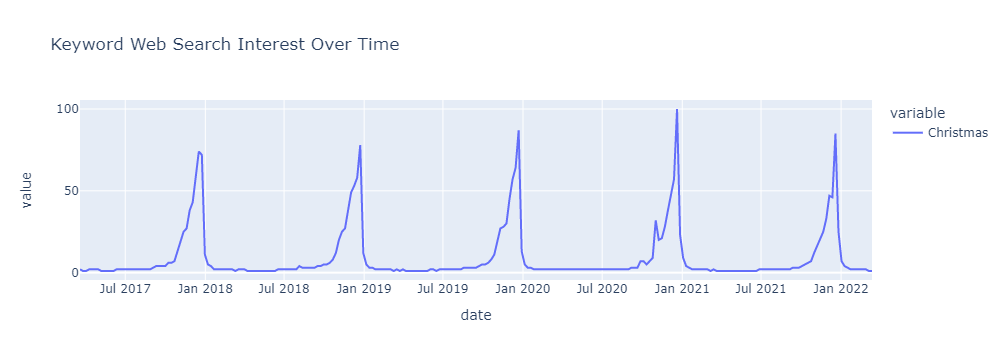



Most Quoted Regions :
             Christmas
geoName               
Kiribati           100
Isle of Man         70
Jersey              66
Guernsey            55
Ireland             53


Most related keywords :


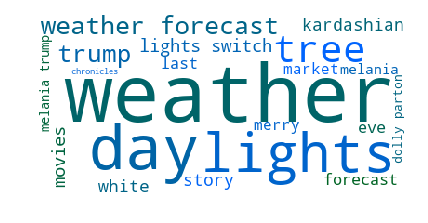

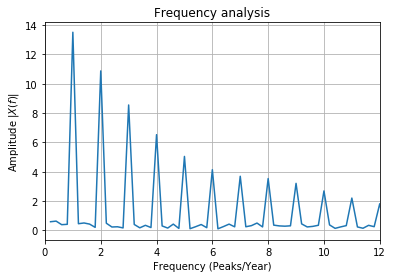

Most Relevant yearly frequency : 1.0 peaks/year
Most frequent month : December


In [174]:
pytrends = TrendReq(hl='en-US', tz=360) 
kw_list = [topic] 
pytrends.build_payload(kw_list, cat=16, timeframe='today '+str(nb_years)+'-y') 

data = pytrends.interest_over_time() 
data = data.reset_index() 
fig = px.line(data, x="date", y=[topic], title='Keyword Web Search Interest Over Time')
fig.show() 

by_region = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
print()
print()
print('Most Quoted Regions :')
print(by_region[by_region[topic] > 10].sort_values(by = topic, ascending = False).head())
      
print()
print()
print('Most related keywords :')
data_q  = pytrends.related_queries()
df_query = data_q[topic]['top']
words = ""
for i in range(len(df_query)):
    value = df_query.iloc[i, 1]
    query = df_query.iloc[i, 0]
    for j in range(value):
        words += (query + ' ')
stop_words = set(stopwords.words('english') + [topic])
wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, max_words = 50).generate(words)
def couleur(*args, **kwargs):
    return "rgb(0, 100, {})".format(random.randint(0, 255))  
plt.figure(figsize=(6, 4), dpi=80)
plt.imshow(wordcloud.recolor(color_func = couleur))
plt.axis("off")
plt.show()


print()
X = fft(data[topic])  # Transformée de fourier
freq = fftfreq(x.size, d=1/(len(data)))  # Fréquences de la transformée de Fourier

# Calcul du nombre d'échantillon
N = x.size

# On prend la valeur absolue de l'amplitude uniquement pour les fréquences positives et normalisation
X_abs = np.abs(X[:N//2])*2.0/N
# On garde uniquement les fréquences positives
freq_pos = freq[:N//2]/nb_years

plt.plot(freq_pos[1:], X_abs[1:], label="Amplitude absolue")
plt.xlim(0, 12)  # On réduit la plage des fréquences à la zone utile
plt.grid()
plt.xlabel(r"Frequency (Peaks/Year)")
plt.ylabel(r"Amplitude $|X(f)|$")
plt.title("Frequency analysis")
plt.show()

print('Most Relevant yearly frequency :', freq_pos[np.argmax(X_abs[1:]) + 1], 'peaks/year')
no1_month = mode(data[data[topic] > np.quantile(data[topic].values, 0.9)].date.apply(lambda x : x.month).values)
print('Most frequent month :', months[no1_month - 1])